In [1]:
import json
import pandas as pd
import numpy as np
from collections import Counter
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pos=pd.read_csv("pos(tt명사추출).csv", index_col=0)
nag=pd.read_csv("nag(tt명사추출).csv", index_col=0)
neu=pd.read_csv("neu(tt명사추출).csv", index_col=0)

In [3]:
neu=pd.read_csv("neu(tt명사추출).csv", index_col=0)

In [4]:
pona=pd.concat([pos,nag],ignore_index=True)

In [5]:
pd.Series(pona.tt)#train

0       개요 누 비드 치 메타 버스 통해 브랜딩 본질 매체 카카오 음 진행 포럼 클럽 하우...
1                                             인사 한국 증권 금융
2       경기 핫 타임 뉴스 김삼 기자 용인시 연말 시 이웃 돕기 운동 사랑 열차 이어달리기...
3       경기 핫 타임 뉴스 김삼 기자 항진 여주시 설 명절 맞이 직접 전통 시장 상점가 방...
4       경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
                              ...                        
6255    은 사국 주택 시장 리스크 평가 통해 기준금리 포인트 인상 경우 기준금리 현 유지 ...
6256    이재연 기자 사진 은 주택 시장 리스크 평가 주택 가격 금리 데이터 분석 가계부채 ...
6257    뒤 주택 가격 조사 기준금리 인상 주택 가격 영향 계량 모형 통해 추정 결과 기준금...
6258    서울 아시아 뉴스 통신 장하준 기자 송 댓글 작성 회원 가입 회원 가입 시 주민 번...
6259    서울 아시아 뉴스 통신 장하준 기자 송 댓글 작성 회원 가입 회원 가입 시 주민 번...
Name: tt, Length: 6260, dtype: object

In [6]:
pd.Series(neu.tt)#test

0        매출 적자 폭도 크게 상승 리얼리티 랩스 전체 운영 손실 달러 한화 약 달 마크 저...
1        경기 핫 타임 뉴스 김삼 기자 규모 법원 공탁 금 보유 과태료 과징금 이행강제금 외...
2        경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
3        경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
4        경기 핫 타임 뉴스 김삼 기자 지난해 경기도 발생 화재 감소 경기도 방재 부가 발표...
                               ...                        
20177    회사 제외 미만 상승 폭 보이 낙폭 기록 흥국 에프 엔비 코스닥 시장 오후 시 분 ...
20178    온라인 코딩 교육 플랫폼 스파르타 코딩 클럽 통해 맵 제작 관련 강의 콘텐츠 메타 ...
20179    달러 약 만원 내용 코인 데스크 프리미엄 코인 보유 수익 의미 손해 말 값 장기 홀...
20180    애드엑스 인수 합병 애드 출시 성장 세 실시간 경매 방식 기술 기반 제공 애드 국내...
20181    계속 국내 상황 긍정 코로나 불확실 확대 이연 약국 신규 개국 증가 추정 가운데 분...
Name: tt, Length: 20182, dtype: object

In [7]:
print(pona.docsent.value_counts())

positive    4065
negative    2195
Name: docsent, dtype: int64


In [8]:
def freq_count(data):
    wc_word=[]
    word_list=[]
    for i in range(len(data.tt)):
        wc_word.append(data.tt[i].split(' '))
    for j in range(len(wc_word)):
        for k in range(len(wc_word[j])):
            word_list.append(wc_word[j][k])
    dict={}
    dict=collections.Counter(word_list)
    freqeuncies = pd.Series(dict).sort_values(ascending=False)
    return(freqeuncies)

    

In [9]:
freq_count(nag)[:20] #neg_freq

금리     3564
고      2967
대출     2903
시장     2552
말      2335
은행     2314
금융     2126
미국     2010
투자     1966
상승     1921
거래     1916
기업     1897
러시아    1868
달러     1798
물가     1738
하락     1701
인상     1678
경제     1575
가격     1563
더      1505
dtype: int64

In [10]:
freq_count(pos)[:20] #pos_freq

기업     5242
사업     4397
금융     3581
위      3305
통해     3264
지원     3198
투자     3168
지역     2859
서비스    2850
고      2717
시장     2288
말      2198
제공     2163
그룹     2082
고객     2053
기사     2046
대표     1996
사회     1908
명      1902
글로벌    1757
dtype: int64

In [11]:
def tokens(df):
    wc_word=[]
    for i in range(len(df.tt)):
        wc_word.append(df.tt[i].split(' '))
    return wc_word
tokens_pona=pd.Series(tokens(pona))
print(tokens_pona)

0       [개요, 누, 비드, 치, 메타, 버스, 통해, 브랜딩, 본질, 매체, 카카오, 음...
1                                        [인사, 한국, 증권, 금융]
2       [경기, 핫, 타임, 뉴스, 김삼, 기자, 용인시, 연말, 시, 이웃, 돕기, 운동...
3       [경기, 핫, 타임, 뉴스, 김삼, 기자, 항진, 여주시, 설, 명절, 맞이, 직접...
4       [경기도, 시흥시, 배, 목감동, 미디어, 타임즈, 모든, 컨텐츠, 저작권법, 보호...
                              ...                        
6255    [은, 사국, 주택, 시장, 리스크, 평가, 통해, 기준금리, 포인트, 인상, 경우...
6256    [이재연, 기자, 사진, 은, 주택, 시장, 리스크, 평가, 주택, 가격, 금리, ...
6257    [뒤, 주택, 가격, 조사, 기준금리, 인상, 주택, 가격, 영향, 계량, 모형, ...
6258    [서울, 아시아, 뉴스, 통신, 장하준, 기자, 송, 댓글, 작성, 회원, 가입, ...
6259    [서울, 아시아, 뉴스, 통신, 장하준, 기자, 송, 댓글, 작성, 회원, 가입, ...
Length: 6260, dtype: object


In [12]:
def draw_top_hist(data,name,color): #히스토그램을 그려줍니다.
  top_50 = data[:20]
  plt.figure(figsize=(24,15))
  plt.rc('font', family='Malgun Gothic') 
  plt.rc('xtick', labelsize=30)  # x축 눈금 폰트 크기 
  plt.rc('ytick', labelsize=30)  # y축 눈금 폰트 크기
  plt.suptitle("Bar Plot", fontsize=30)
  plt.title(name, fontsize=15)
  plt.bar(top_50.index,top_50.values, width=0.5, color= color, alpha=0.5)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

In [13]:
pos_freq=freq_count(pos)
neg_freq=freq_count(nag)
all_freqeuncies=freq_count(pona)

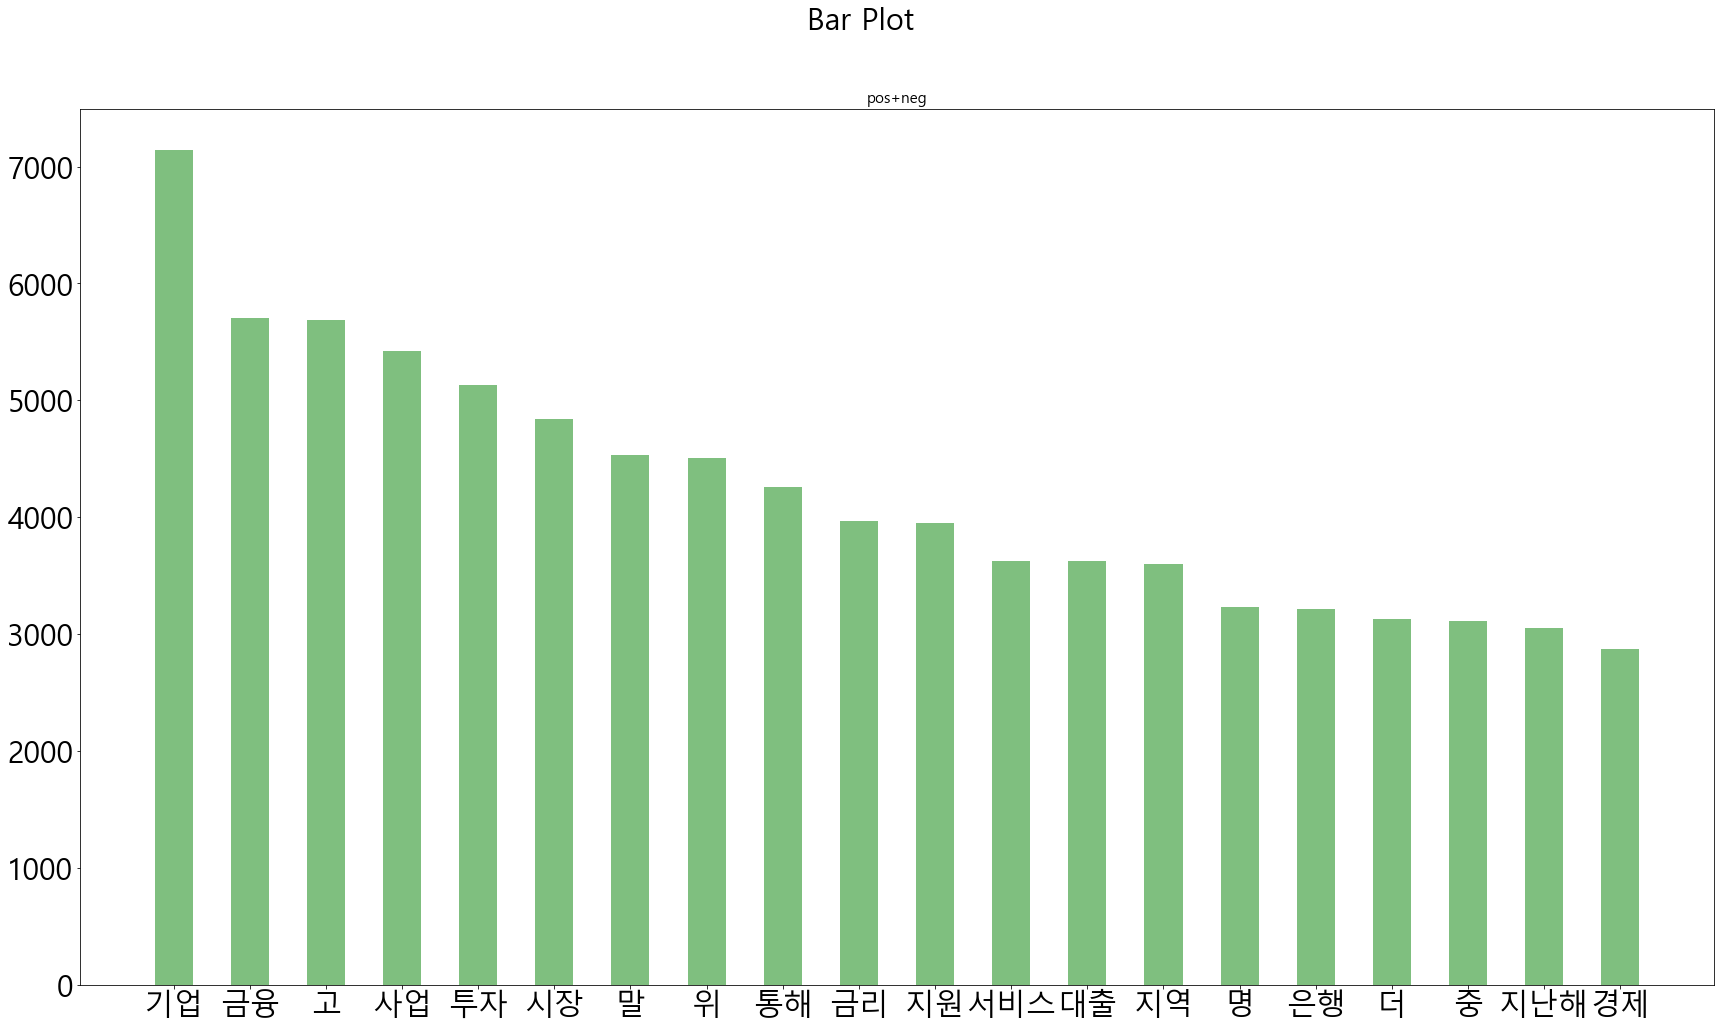

In [14]:
draw_top_hist(all_freqeuncies,'pos+neg','g')

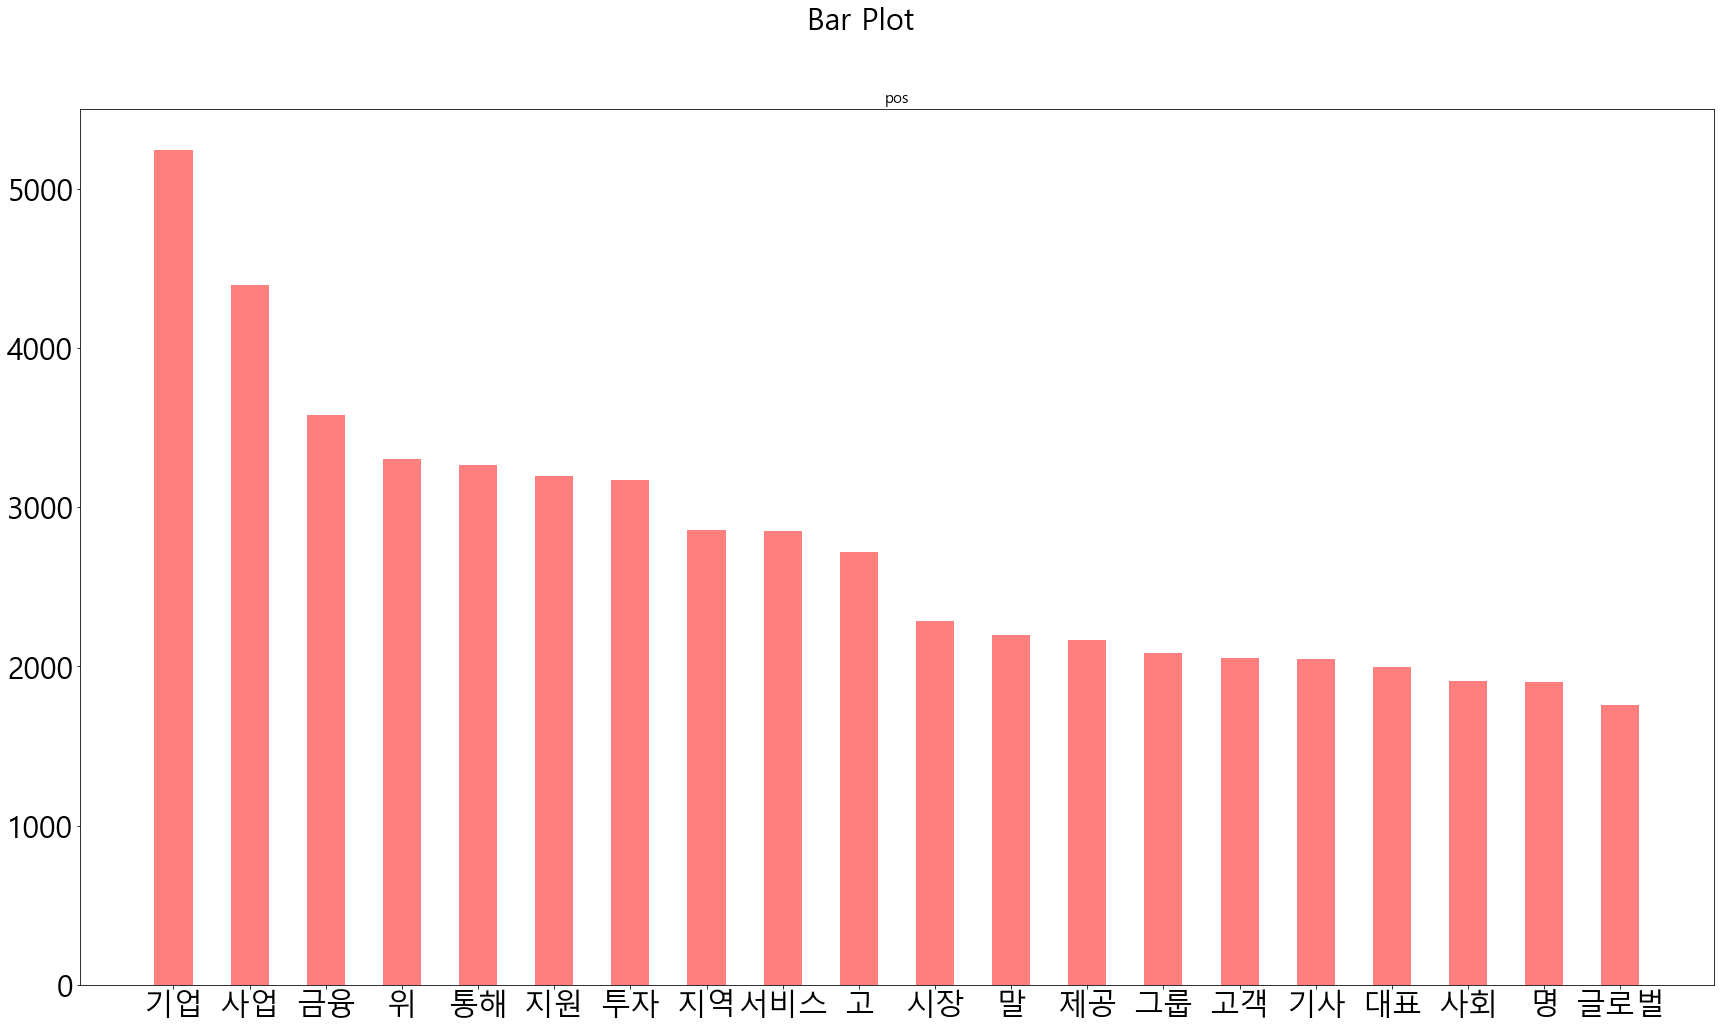

In [15]:
draw_top_hist(pos_freq,'pos','r')

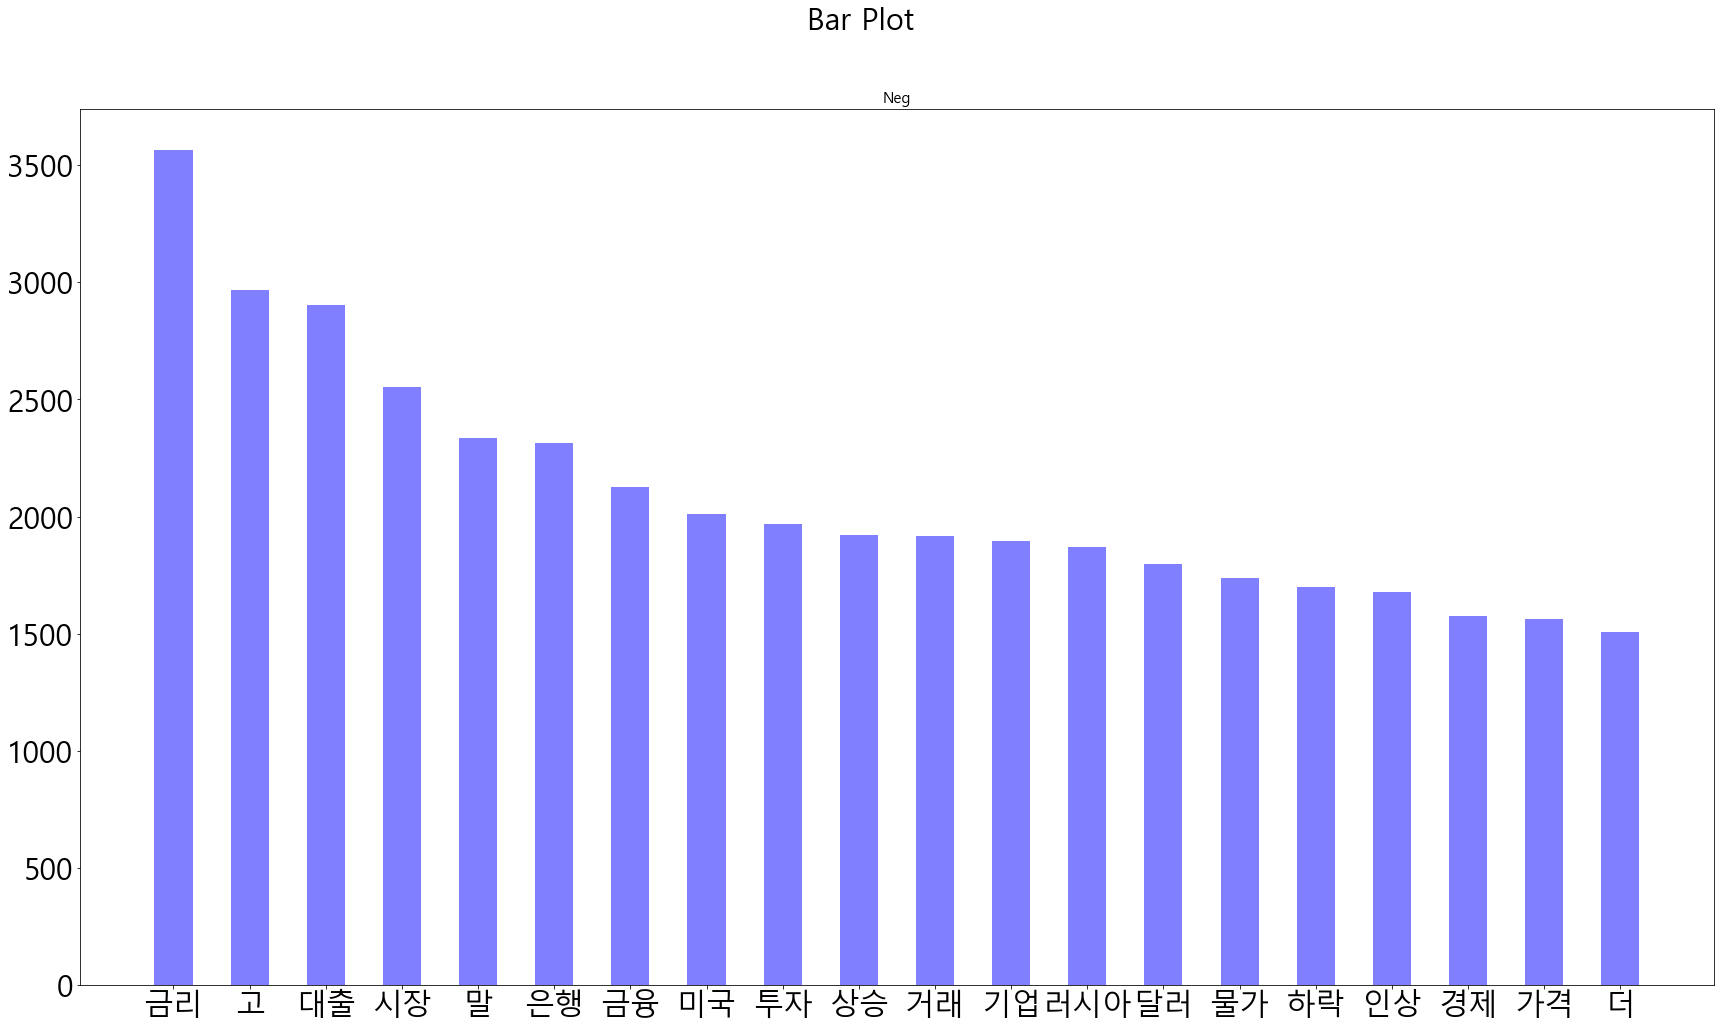

In [16]:
draw_top_hist(neg_freq,'Neg','b')

In [17]:
top_50_pos = pos_freq[:200] #빈도수 상위 200개에서 공통명사 추출
top_50_neg = neg_freq[:200]
common_words = [p for p in top_50_pos.index if p in top_50_neg.index]
common_words

['기업',
 '사업',
 '금융',
 '위',
 '통해',
 '지원',
 '투자',
 '지역',
 '서비스',
 '고',
 '시장',
 '말',
 '제공',
 '기사',
 '대표',
 '사회',
 '명',
 '글로벌',
 '진행',
 '성장',
 '더',
 '중',
 '지난해',
 '개',
 '한국',
 '회사',
 '계획',
 '평가',
 '기자',
 '올해',
 '매출',
 '시',
 '증가',
 '대비',
 '대상',
 '전체',
 '전',
 '확대',
 '산업',
 '경제',
 '운영',
 '기술',
 '뉴스',
 '코로나',
 '만원',
 '관련',
 '내',
 '지속',
 '정책',
 '날',
 '국내',
 '분기',
 '자산',
 '정보',
 '상품',
 '증권',
 '기록',
 '은',
 '직원',
 '최대',
 '서울',
 '관리',
 '액',
 '거래',
 '점',
 '영업',
 '실적',
 '비',
 '은행',
 '세계',
 '달러',
 '최근',
 '달',
 '상승',
 '관계자',
 '시작',
 '약',
 '규모',
 '기준',
 '정부',
 '보험',
 '최고',
 '이익',
 '며',
 '세',
 '대출',
 '현재',
 '주',
 '이용',
 '발표',
 '경우',
 '상황',
 '설명',
 '기간',
 '분석',
 '미국',
 '위원회',
 '수익',
 '결과',
 '전망',
 '도',
 '기관',
 '확인',
 '가격']

In [18]:
total = all_freqeuncies.sum()
common_words_cnt = all_freqeuncies[common_words].sum()
print(f'total words count: {total} removed: {common_words_cnt} ratio: {common_words_cnt / total :.2f}')

total words count: 1153392 removed: 243945 ratio: 0.21


In [19]:
def clean_token(tokens):
    clean_token_list = []
    for token in tokens:
        clean_token = list(filter(lambda x: x not in common_words,token))
        clean_token_list.append(clean_token)
        clean_tokens = pd.Series(clean_token_list)
    return clean_tokens

In [20]:
clean_tokens_pona=clean_token(tokens_pona)


In [21]:
clean_tokens_pona

0       [개요, 누, 비드, 치, 메타, 버스, 브랜딩, 본질, 매체, 카카오, 음, 포럼...
1                                                    [인사]
2       [경기, 핫, 타임, 김삼, 용인시, 연말, 이웃, 돕기, 운동, 사랑, 열차, 이...
3       [경기, 핫, 타임, 김삼, 항진, 여주시, 설, 명절, 맞이, 직접, 전통, 상점...
4       [경기도, 시흥시, 배, 목감동, 미디어, 타임즈, 모든, 컨텐츠, 저작권법, 보호...
                              ...                        
6255    [사국, 주택, 리스크, 기준금리, 포인트, 인상, 기준금리, 현, 유지, 주택, ...
6256    [이재연, 사진, 주택, 리스크, 주택, 금리, 데이터, 가계부채, 누증, 변동, ...
6257    [뒤, 주택, 조사, 기준금리, 인상, 주택, 영향, 계량, 모형, 추정, 기준금리...
6258    [아시아, 통신, 장하준, 송, 댓글, 작성, 회원, 가입, 회원, 가입, 주민, ...
6259    [아시아, 통신, 장하준, 송, 댓글, 작성, 회원, 가입, 회원, 가입, 주민, ...
Length: 6260, dtype: object

In [22]:
clean_tokens=clean_tokens_pona

In [23]:
def get_freq_count(tokens):
  pos_token = tokens[pona['docsent'] == 'positive']
  neg_token = tokens[pona['docsent'] == 'negative']
  pos_freq = pd.Series(np.concatenate([w for w in pos_token])).value_counts()
  neg_freq = pd.Series(np.concatenate([w for w in neg_token])).value_counts()
  return pos_freq, neg_freq

In [24]:
pos_freq,neg_freq = get_freq_count(clean_tokens_pona)

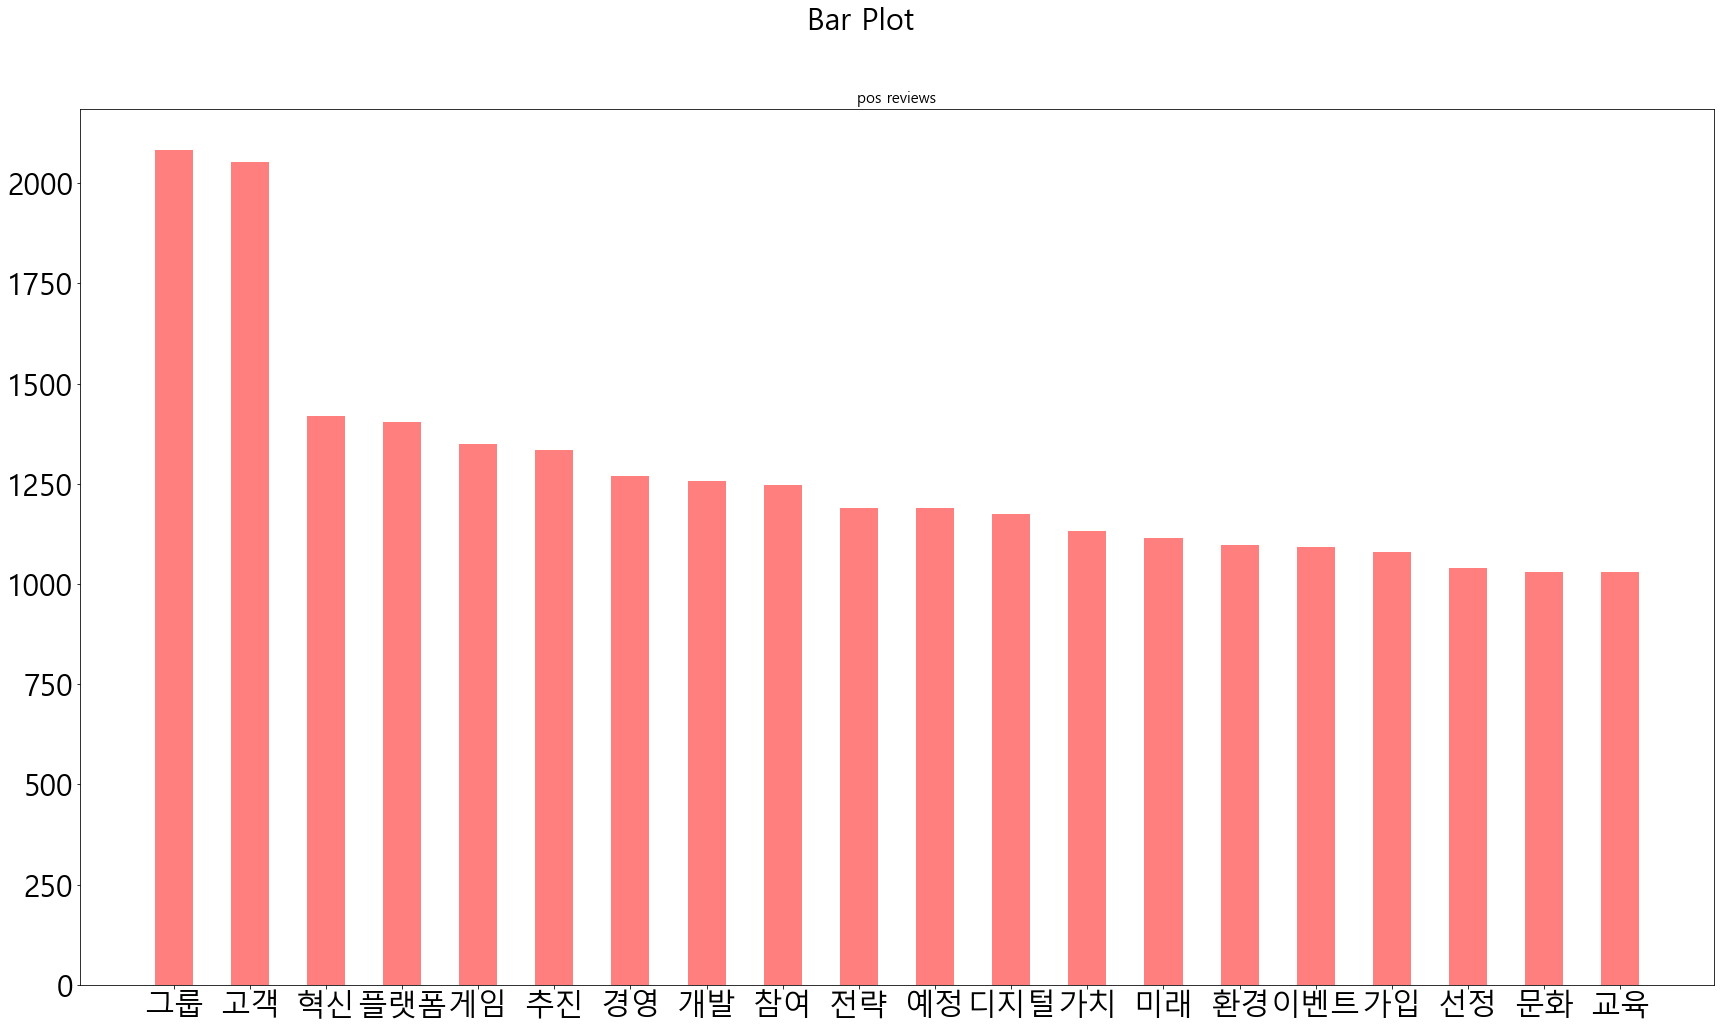

In [25]:
draw_top_hist(pos_freq,'pos reviews','r')

In [26]:
pos_freq[:20]

그룹     2082
고객     2053
혁신     1418
플랫폼    1404
게임     1350
추진     1335
경영     1270
개발     1256
참여     1247
전략     1190
예정     1190
디지털    1175
가치     1132
미래     1115
환경     1097
이벤트    1093
가입     1080
선정     1039
문화     1031
교육     1031
dtype: int64

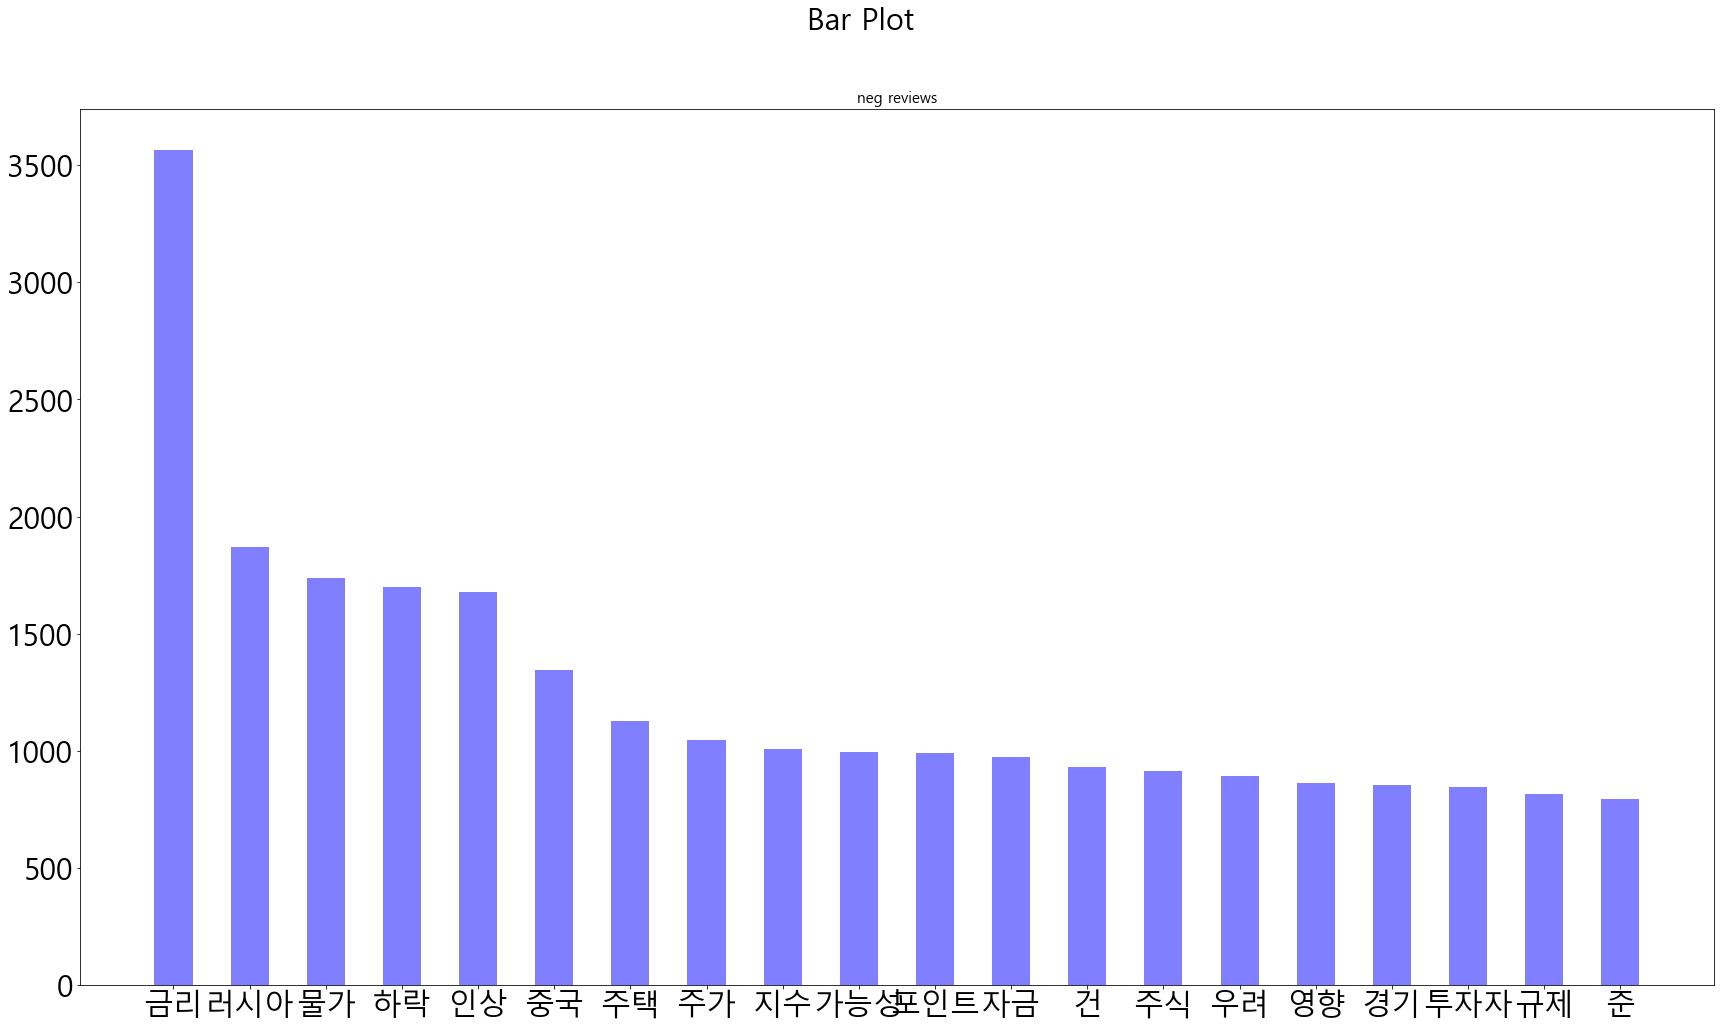

In [27]:
draw_top_hist(neg_freq,'neg reviews','b')

In [28]:
neg_freq[:20]

금리     3564
러시아    1868
물가     1738
하락     1701
인상     1678
중국     1346
주택     1127
주가     1044
지수     1007
가능성     993
포인트     988
자금      975
건       929
주식      915
우려      892
영향      863
경기      853
투자자     846
규제      817
준       794
dtype: int64

Text(0.5, 0.98, '19300 words explain 99.0% of total words dirtribution')

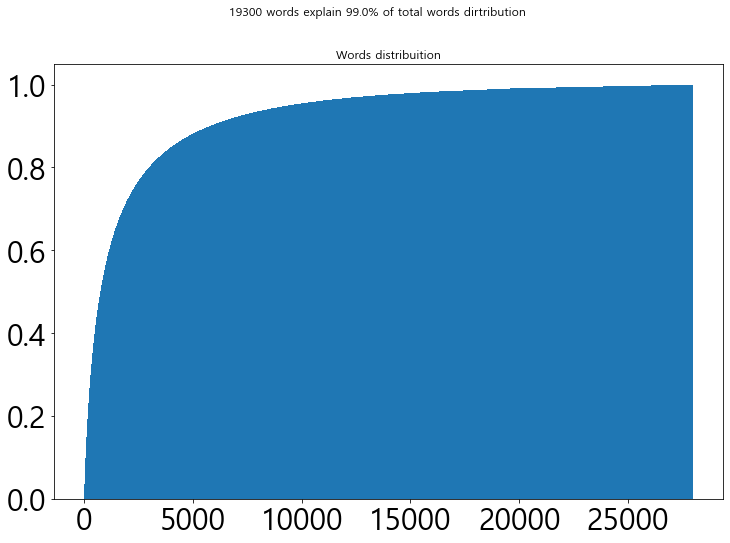

In [29]:
clean_frequencies = pd.Series(np.concatenate([w for w in clean_tokens])).value_counts()
accumulate_words = np.add.accumulate(clean_frequencies) #빈도수의 누적합을 구해줍니다.
ratio = 0.99
words_cnt = np.where(accumulate_words > sum(clean_frequencies) * 0.99)[0][0]
plt.figure(figsize=(12,8))
plt.bar(range(0,len(clean_frequencies)), accumulate_words / sum(clean_frequencies), width=1.0) #전체 단어와 현재까지의 빈도수의 비율을 구해줍니다.
plt.title('Words distribuition')
plt.suptitle(f'{words_cnt} words explain {ratio * 100:.1f}% of total words dirtribution')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


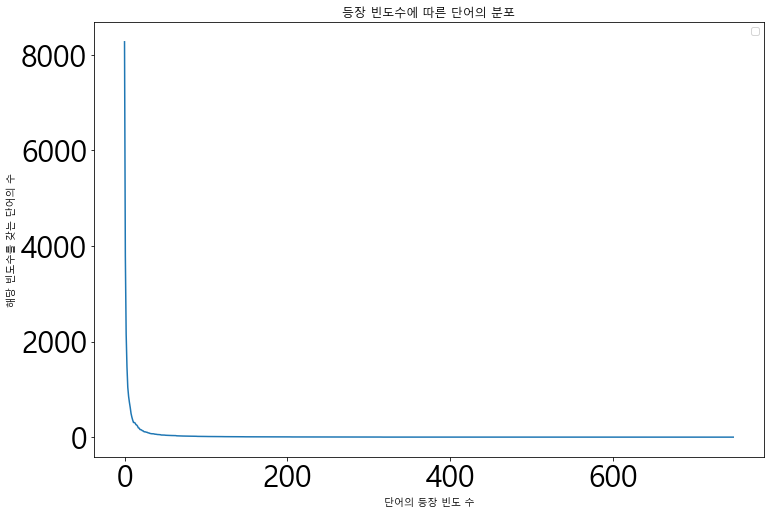

In [30]:
words_distribution = clean_frequencies.value_counts()
plt.figure(figsize=(12,8))
plt.plot(range(0,len(words_distribution)), words_distribution.values)
plt.ylabel("해당 빈도수를 갖는 단어의 수")
plt.xlabel("단어의 등장 빈도 수")
plt.title("등장 빈도수에 따른 단어의 분포")
plt.legend()

In [31]:
for i in range(len(pona.docsent)):
    if pona.docsent[i]=="positive":
        pona.docsent[i]=1
    else:
        pona.docsent[i]=0

C:\Users\82104\AppData\Local\Temp\ipykernel_5396\1105620376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pona.docsent[i]=1
C:\Users\82104\AppData\Local\Temp\ipykernel_5396\1105620376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pona.docsent[i]=0


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
train=pona

In [34]:
X = clean_tokens.apply(' '.join) #벡터화를 위해서 배열을 문자열로 합쳐줍니다.
y = pona['docsent']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=232) #학습 데이터와 검증 데이터를 분리합니다.

In [35]:
y_train=y_train.astype('int')

In [36]:
y_eval=y_eval.astype('int')

In [37]:
from sklearn.metrics import f1_score
#최적의 파라미터를 찾습니다.
best_max_feature = 0
best_cost = 0
best_f1 = 0
for i in range(100, 5000, 100): #max feature 값을 이동시키며 최적값을 찾습니다.
  vectorizer = TfidfVectorizer(analyzer='word',sublinear_tf=True,ngram_range=(1,3),max_features=i) 
  X_train_vector = vectorizer.fit_transform(X_train)
  X_eval_vector = vectorizer.transform(X_eval)
  for c in [0.01,0.03,0.1,0.3,1,3,10]: #cost 값을 이동시키며 최적 값을 찾습니다.
      lgs = LogisticRegression(class_weight = 'balanced', max_iter=2000, C = c)
      lgs.fit(X_train_vector, y_train)
      yhat = lgs.predict_proba(X_eval_vector)
      predicted = lgs.predict(X_eval_vector)
      f1 = f1_score(y_eval, predicted)
      accuracy = sum(predicted == y_eval) / len(predicted)
      if best_f1 < f1:
        print(f"Accuracy: {accuracy} f1-score: {f1}, max-features:{i}")
        best_max_feature = i
        best_cost = c
        best_f1 = f1

Accuracy: 0.84185303514377 f1-score: 0.8801452784503632, max-features:100
Accuracy: 0.8442492012779552 f1-score: 0.8816029143897997, max-features:100
Accuracy: 0.8482428115015974 f1-score: 0.8841463414634146, max-features:100
Accuracy: 0.8514376996805112 f1-score: 0.886029411764706, max-features:100
Accuracy: 0.854632587859425 f1-score: 0.8883435582822087, max-features:200
Accuracy: 0.8594249201277955 f1-score: 0.8920245398773007, max-features:200
Accuracy: 0.8666134185303515 f1-score: 0.8972307692307693, max-features:200
Accuracy: 0.8666134185303515 f1-score: 0.8976088289393009, max-features:200
Accuracy: 0.8666134185303515 f1-score: 0.8977342314758114, max-features:300
Accuracy: 0.8690095846645367 f1-score: 0.8996328029375764, max-features:300
Accuracy: 0.8714057507987221 f1-score: 0.9009230769230769, max-features:400
Accuracy: 0.8753993610223643 f1-score: 0.9047619047619047, max-features:400
Accuracy: 0.8809904153354633 f1-score: 0.9094224924012158, max-features:400
Accuracy: 0.8833

In [38]:
print(f"max_feature: {best_max_feature} cost: {best_cost} f1: {best_f1}") #최적의 파라미터

max_feature: 4400 cost: 1 f1: 0.9176904176904176


In [39]:
vectorizer = TfidfVectorizer(analyzer='word',sublinear_tf = True,
                             ngram_range=(1,3),
                             max_features=best_max_feature)                                         #최적의 파라미터를 기준으로 벡터화를 진행합니다.
X_train_vector = vectorizer.fit_transform(X_train)
X_eval_vector = vectorizer.transform(X_eval)
lgs = LogisticRegression(class_weight = 'balanced', max_iter=2000, C = best_cost)
lgs.fit(X_train_vector, y_train)
yhat = lgs.predict_proba(X_eval_vector)
yhat = yhat[:,1]                                                                                           #1인 경우의 확률만 구해줍니다.
predicted = lgs.predict(X_eval_vector)
f1 = f1_score(y_eval, predicted)
print(f"Accuracy: {lgs.score(X_eval_vector, y_eval)}")
print(f"f1-score: {f1}")

Accuracy: 0.8929712460063898
f1-score: 0.9176904176904176


Best Threshold=0.482583, F-Score=0.920


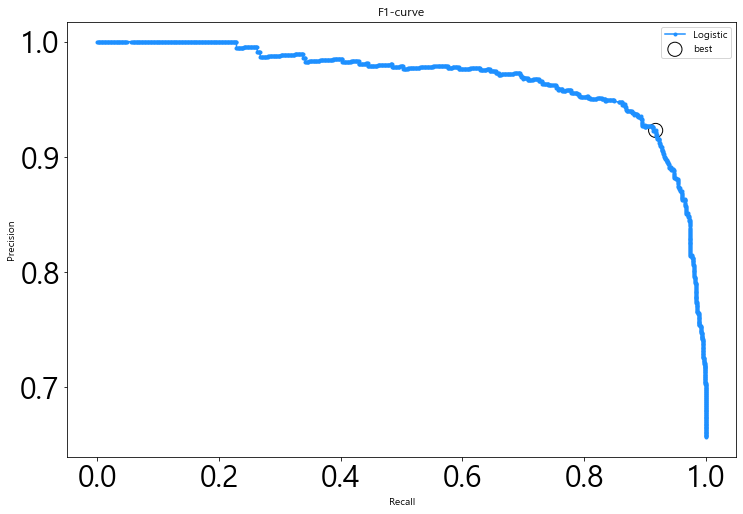

In [40]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_eval,yhat)
plt.figure(figsize=(12,8))
plt.plot(recalls, precisions, marker='.', label='Logistic', color='dodgerblue')
f1_score_list = (2 * precisions * recalls) / (precisions + recalls)
max_index = np.argmax(f1_score_list)
best_threshold = thresholds[max_index]
#s는 마커의 사이즈 facecolor는 마크의 내부 색상 edgecolor는 마크의 테두리 색상을 의미
plt.scatter(recalls[max_index],precisions[max_index],marker='o',color='black',label='best',
            s=200,facecolors='none',edgecolors='black')
plt.title('F1-curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
print('Best Threshold=%f, F-Score=%.3f' % (best_threshold, f1_score_list[max_index]))

In [41]:
threshold = best_threshold
y_pred = np.where(yhat >= threshold,1,0)
f1 = f1_score(y_eval,y_pred,average='binary')
print(f"f1:{f1}")

f1:0.9200732153752289


In [42]:
test = neu

In [43]:
neu

,title,url,host,imgurl,docsent,sentscore,text,tt
0,메타 메타버스 관련 매출 두 배 뛰었지만 조 원 적자,https://www.inven.co.kr/webzine/news/?iskin=vr...,inven.co.kr,https://static.inven.co.kr/column/2022/02/03/n...,neutral,0.0,다만 매출에 비해 적자 폭도 크게 상승했다 리얼리티 랩스의 년 전체 운영 ...,매출 적자 폭도 크게 상승 리얼리티 랩스 전체 운영 손실 달러 한화 약 달 마크 저...
1,경기도 세외수입 체납자 법원 공탁금 전수 조사 체납액 억 원 압류,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,neutral,0.0,경기핫타임뉴스 김삼영 기자 수천만 원 규모의 법원 공탁금을 보유하고도 과태료 ...,경기 핫 타임 뉴스 김삼 기자 규모 법원 공탁 금 보유 과태료 과징금 이행강제금 외...
2,광주시 경기도경제과학진흥원 동부권역센터 유치 확정,http://m.mdtimes.kr/184305,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,neutral,0.0,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
3,전남도 억 서면 투자협약 기업유치 박차,http://m.mdtimes.kr/184175,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,neutral,0.0,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
4,지난해 경기도 화재 건 발생 년 대비 감소,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,neutral,0.0,경기핫타임뉴스 김삼영 기자 지난해 경기도에서 발생한 화재가 전년 년 보다...,경기 핫 타임 뉴스 김삼 기자 지난해 경기도 발생 화재 감소 경기도 방재 부가 발표...
...,...,...,...,...,...,...,...,...
20177,흥국에프엔비 오후 갑작스런 급등 원선 재돌파,http://www.econonews.co.kr/news/articleView.ht...,econonews.co.kr,https://cdn.econonews.co.kr/news/thumbnail/202...,neutral,0.0,이 회사는 일을 제외하고 일부터 일까지 미만의 상승폭을 보이다 일 ...,회사 제외 미만 상승 폭 보이 낙폭 기록 흥국 에프 엔비 코스닥 시장 오후 시 분 ...
20178,踰 援 二쇱 濡 怨듬 媛,https://m.betanews.net/article/1350626,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,neutral,0.0,월 일 온라인 코딩 교육 플랫폼 스파르타코딩클럽 을 통해 맵 제작...,온라인 코딩 교육 플랫폼 스파르타 코딩 클럽 통해 맵 제작 관련 강의 콘텐츠 메타 ...
20179,트윗시황 원숭이 코인 로 구찌 산다,http://www.coindeskkorea.com/news/articleView....,coindeskkorea.com,https://cdn.coindeskkorea.com/news/photo/20220...,neutral,0.0,만 달러 약 만원 - - ...,달러 약 만원 내용 코인 데스크 프리미엄 코인 보유 수익 의미 손해 말 값 장기 홀...
20180,댁 愿 湲 嫄곕,https://m.betanews.net/article/1350628,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,neutral,0.0,년 애드엑스에 인수 합병된 애드파이는 년 출시 이후 년 억...,애드엑스 인수 합병 애드 출시 성장 세 실시간 경매 방식 기술 기반 제공 애드 국내...


In [44]:
X_test = test['tt']
X_test = vectorizer.transform(X_test) #test 데이터에 벡터화를 진행합니다.
pred = lgs.predict(X_test)

In [45]:
test.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            20172, 20173, 20174, 20175, 20176, 20177, 20178, 20179, 20180,
            20181],
           dtype='int64', length=20182)

In [46]:
res = pd.DataFrame()
res.index = test.index
tyhat = lgs.predict_proba(X_test)
tyhat = tyhat[:,1]                                  #1인 경우의 확률만 구해줍니다.
ty_pred = np.where(tyhat >= best_threshold,1,0)
res['docsent'] = ty_pred

In [47]:
neu['docsent'] = ty_pred

In [48]:
neu

,title,url,host,imgurl,docsent,sentscore,text,tt
0,메타 메타버스 관련 매출 두 배 뛰었지만 조 원 적자,https://www.inven.co.kr/webzine/news/?iskin=vr...,inven.co.kr,https://static.inven.co.kr/column/2022/02/03/n...,0,0.0,다만 매출에 비해 적자 폭도 크게 상승했다 리얼리티 랩스의 년 전체 운영 ...,매출 적자 폭도 크게 상승 리얼리티 랩스 전체 운영 손실 달러 한화 약 달 마크 저...
1,경기도 세외수입 체납자 법원 공탁금 전수 조사 체납액 억 원 압류,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,0,0.0,경기핫타임뉴스 김삼영 기자 수천만 원 규모의 법원 공탁금을 보유하고도 과태료 ...,경기 핫 타임 뉴스 김삼 기자 규모 법원 공탁 금 보유 과태료 과징금 이행강제금 외...
2,광주시 경기도경제과학진흥원 동부권역센터 유치 확정,http://m.mdtimes.kr/184305,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,1,0.0,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
3,전남도 억 서면 투자협약 기업유치 박차,http://m.mdtimes.kr/184175,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,1,0.0,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
4,지난해 경기도 화재 건 발생 년 대비 감소,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,0,0.0,경기핫타임뉴스 김삼영 기자 지난해 경기도에서 발생한 화재가 전년 년 보다...,경기 핫 타임 뉴스 김삼 기자 지난해 경기도 발생 화재 감소 경기도 방재 부가 발표...
...,...,...,...,...,...,...,...,...
20177,흥국에프엔비 오후 갑작스런 급등 원선 재돌파,http://www.econonews.co.kr/news/articleView.ht...,econonews.co.kr,https://cdn.econonews.co.kr/news/thumbnail/202...,1,0.0,이 회사는 일을 제외하고 일부터 일까지 미만의 상승폭을 보이다 일 ...,회사 제외 미만 상승 폭 보이 낙폭 기록 흥국 에프 엔비 코스닥 시장 오후 시 분 ...
20178,踰 援 二쇱 濡 怨듬 媛,https://m.betanews.net/article/1350626,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,1,0.0,월 일 온라인 코딩 교육 플랫폼 스파르타코딩클럽 을 통해 맵 제작...,온라인 코딩 교육 플랫폼 스파르타 코딩 클럽 통해 맵 제작 관련 강의 콘텐츠 메타 ...
20179,트윗시황 원숭이 코인 로 구찌 산다,http://www.coindeskkorea.com/news/articleView....,coindeskkorea.com,https://cdn.coindeskkorea.com/news/photo/20220...,0,0.0,만 달러 약 만원 - - ...,달러 약 만원 내용 코인 데스크 프리미엄 코인 보유 수익 의미 손해 말 값 장기 홀...
20180,댁 愿 湲 嫄곕,https://m.betanews.net/article/1350628,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,1,0.0,년 애드엑스에 인수 합병된 애드파이는 년 출시 이후 년 억...,애드엑스 인수 합병 애드 출시 성장 세 실시간 경매 방식 기술 기반 제공 애드 국내...


In [49]:
for i in range(len(neu.docsent)):
    if neu.docsent[i]==1:
        neu.docsent[i]="positive"
    elif neu.docsent[i]==0:
        neu.docsent[i]="negative"

C:\Users\82104\AppData\Local\Temp\ipykernel_5396\386651840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu.docsent[i]="negative"


In [50]:
neu

,title,url,host,imgurl,docsent,sentscore,text,tt
0,메타 메타버스 관련 매출 두 배 뛰었지만 조 원 적자,https://www.inven.co.kr/webzine/news/?iskin=vr...,inven.co.kr,https://static.inven.co.kr/column/2022/02/03/n...,negative,0.0,다만 매출에 비해 적자 폭도 크게 상승했다 리얼리티 랩스의 년 전체 운영 ...,매출 적자 폭도 크게 상승 리얼리티 랩스 전체 운영 손실 달러 한화 약 달 마크 저...
1,경기도 세외수입 체납자 법원 공탁금 전수 조사 체납액 억 원 압류,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,negative,0.0,경기핫타임뉴스 김삼영 기자 수천만 원 규모의 법원 공탁금을 보유하고도 과태료 ...,경기 핫 타임 뉴스 김삼 기자 규모 법원 공탁 금 보유 과태료 과징금 이행강제금 외...
2,광주시 경기도경제과학진흥원 동부권역센터 유치 확정,http://m.mdtimes.kr/184305,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.0,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
3,전남도 억 서면 투자협약 기업유치 박차,http://m.mdtimes.kr/184175,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.0,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
4,지난해 경기도 화재 건 발생 년 대비 감소,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,negative,0.0,경기핫타임뉴스 김삼영 기자 지난해 경기도에서 발생한 화재가 전년 년 보다...,경기 핫 타임 뉴스 김삼 기자 지난해 경기도 발생 화재 감소 경기도 방재 부가 발표...
...,...,...,...,...,...,...,...,...
20177,흥국에프엔비 오후 갑작스런 급등 원선 재돌파,http://www.econonews.co.kr/news/articleView.ht...,econonews.co.kr,https://cdn.econonews.co.kr/news/thumbnail/202...,positive,0.0,이 회사는 일을 제외하고 일부터 일까지 미만의 상승폭을 보이다 일 ...,회사 제외 미만 상승 폭 보이 낙폭 기록 흥국 에프 엔비 코스닥 시장 오후 시 분 ...
20178,踰 援 二쇱 濡 怨듬 媛,https://m.betanews.net/article/1350626,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,positive,0.0,월 일 온라인 코딩 교육 플랫폼 스파르타코딩클럽 을 통해 맵 제작...,온라인 코딩 교육 플랫폼 스파르타 코딩 클럽 통해 맵 제작 관련 강의 콘텐츠 메타 ...
20179,트윗시황 원숭이 코인 로 구찌 산다,http://www.coindeskkorea.com/news/articleView....,coindeskkorea.com,https://cdn.coindeskkorea.com/news/photo/20220...,negative,0.0,만 달러 약 만원 - - ...,달러 약 만원 내용 코인 데스크 프리미엄 코인 보유 수익 의미 손해 말 값 장기 홀...
20180,댁 愿 湲 嫄곕,https://m.betanews.net/article/1350628,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,positive,0.0,년 애드엑스에 인수 합병된 애드파이는 년 출시 이후 년 억...,애드엑스 인수 합병 애드 출시 성장 세 실시간 경매 방식 기술 기반 제공 애드 국내...


In [51]:
tyhat

array([0.23476169, 0.17023554, 0.82488276, ..., 0.32431019, 0.89253895,
       0.5952299 ])

In [52]:
threshold

0.4825825340935658

In [53]:
for i in range(len(tyhat)):
    tyhat[i]=tyhat[i]-threshold
    if tyhat[i]<0:
        tyhat[i]=tyhat[i]*(1/threshold)
    elif tyhat[i]>0:
        tyhat[i]=tyhat[i]*(1/1-threshold)
    else:
        print("err:정확히 0인 값이 존재합니다.")

In [54]:
tyhat

array([-0.51353049, -0.64724058,  0.17711212, ..., -0.32796949,
        0.21211861,  0.05828572])

In [55]:
neu.sentscore=tyhat

In [56]:
neu

,title,url,host,imgurl,docsent,sentscore,text,tt
0,메타 메타버스 관련 매출 두 배 뛰었지만 조 원 적자,https://www.inven.co.kr/webzine/news/?iskin=vr...,inven.co.kr,https://static.inven.co.kr/column/2022/02/03/n...,negative,-0.513530,다만 매출에 비해 적자 폭도 크게 상승했다 리얼리티 랩스의 년 전체 운영 ...,매출 적자 폭도 크게 상승 리얼리티 랩스 전체 운영 손실 달러 한화 약 달 마크 저...
1,경기도 세외수입 체납자 법원 공탁금 전수 조사 체납액 억 원 압류,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,negative,-0.647241,경기핫타임뉴스 김삼영 기자 수천만 원 규모의 법원 공탁금을 보유하고도 과태료 ...,경기 핫 타임 뉴스 김삼 기자 규모 법원 공탁 금 보유 과태료 과징금 이행강제금 외...
2,광주시 경기도경제과학진흥원 동부권역센터 유치 확정,http://m.mdtimes.kr/184305,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.177112,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
3,전남도 억 서면 투자협약 기업유치 박차,http://m.mdtimes.kr/184175,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.185364,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
4,지난해 경기도 화재 건 발생 년 대비 감소,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,negative,-0.173114,경기핫타임뉴스 김삼영 기자 지난해 경기도에서 발생한 화재가 전년 년 보다...,경기 핫 타임 뉴스 김삼 기자 지난해 경기도 발생 화재 감소 경기도 방재 부가 발표...
...,...,...,...,...,...,...,...,...
20177,흥국에프엔비 오후 갑작스런 급등 원선 재돌파,http://www.econonews.co.kr/news/articleView.ht...,econonews.co.kr,https://cdn.econonews.co.kr/news/thumbnail/202...,positive,0.045560,이 회사는 일을 제외하고 일부터 일까지 미만의 상승폭을 보이다 일 ...,회사 제외 미만 상승 폭 보이 낙폭 기록 흥국 에프 엔비 코스닥 시장 오후 시 분 ...
20178,踰 援 二쇱 濡 怨듬 媛,https://m.betanews.net/article/1350626,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,positive,0.241424,월 일 온라인 코딩 교육 플랫폼 스파르타코딩클럽 을 통해 맵 제작...,온라인 코딩 교육 플랫폼 스파르타 코딩 클럽 통해 맵 제작 관련 강의 콘텐츠 메타 ...
20179,트윗시황 원숭이 코인 로 구찌 산다,http://www.coindeskkorea.com/news/articleView....,coindeskkorea.com,https://cdn.coindeskkorea.com/news/photo/20220...,negative,-0.327969,만 달러 약 만원 - - ...,달러 약 만원 내용 코인 데스크 프리미엄 코인 보유 수익 의미 손해 말 값 장기 홀...
20180,댁 愿 湲 嫄곕,https://m.betanews.net/article/1350628,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,positive,0.212119,년 애드엑스에 인수 합병된 애드파이는 년 출시 이후 년 억...,애드엑스 인수 합병 애드 출시 성장 세 실시간 경매 방식 기술 기반 제공 애드 국내...


In [57]:
neu.to_csv("neu(predicted).csv", mode='w')

In [74]:
neu1=neu=pd.read_csv("neu.csv", index_col=0)


In [75]:
neu1['docsent'] = ty_pred

for i in range(len(neu1.docsent)):
    if neu1.docsent[i]==1:
        neu1.docsent[i]="positive"
    elif neu1.docsent[i]==0:
        neu1.docsent[i]="negative"
        
neu1.sentscore=tyhat
neu1.to_csv("neu(predicted_sentscore_and_docsent).csv", mode='w')

C:\Users\82104\AppData\Local\Temp\ipykernel_5396\1780296390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu1.docsent[i]="negative"


In [58]:
pos_in_neu=neu[neu["docsent"]=="positive"]
pos_in_neu=pos_in_neu.reset_index(drop=True)
pos_in_neu

,title,url,host,imgurl,docsent,sentscore,text,tt
0,광주시 경기도경제과학진흥원 동부권역센터 유치 확정,http://m.mdtimes.kr/184305,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.177112,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
1,전남도 억 서면 투자협약 기업유치 박차,http://m.mdtimes.kr/184175,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.185364,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
2,화성시 녹물 없는 우리집 수도관 개량사업 지원,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,positive,0.111423,경기핫타임뉴스 김삼영 기자 화성시가 올해 억 천만 원을 투입해 년 이상 ...,경기 핫 타임 뉴스 김삼 기자 화성시 올해 천만 투입 노후 주택 대상 녹슨 수도관 ...
3,용인시 올해도 공유재산 임대료 감면 최대,http://m.mdtimes.kr/184391,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.177699,경기도 시흥시 배미골길 목감동 미디어타임즈의 모든 컨텐츠는 저작권법 보호를 ...,경기도 시흥시 배 목감동 미디어 타임즈 모든 컨텐츠 저작권법 보호 허가 무단 복제 ...
4,충북 동부축 고속도로망 국가계획 반영 추진,http://m.mdtimes.kr/184361,m.mdtimes.kr,https://f.xza.co.kr/http://www.mdtimes.kr/data...,positive,0.142115,NaN,충북 부축 고속도로 망 국가 계획 반영 추진
...,...,...,...,...,...,...,...,...
11658,휴림로봇 주가 삼성전자 무인공장 도입 소식에 강세,https://ppomppu.co.kr/zboard/view.php?id=news_...,ppomppu.co.kr,https://cdn.ppomppu.co.kr/zboard/data3/hub_new...,positive,0.011104,일 한국거래소에 따르면 휴림로봇은 이날 오전 시 분 기준 전 거래일 대비 ...,한국 거래소 림 로봇 날 오전 시 분 기준 전 거래 대비 오른 거래 중이 무인 공장...
11659,흥국에프엔비 오후 갑작스런 급등 원선 재돌파,http://www.econonews.co.kr/news/articleView.ht...,econonews.co.kr,https://cdn.econonews.co.kr/news/thumbnail/202...,positive,0.045560,이 회사는 일을 제외하고 일부터 일까지 미만의 상승폭을 보이다 일 ...,회사 제외 미만 상승 폭 보이 낙폭 기록 흥국 에프 엔비 코스닥 시장 오후 시 분 ...
11660,踰 援 二쇱 濡 怨듬 媛,https://m.betanews.net/article/1350626,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,positive,0.241424,월 일 온라인 코딩 교육 플랫폼 스파르타코딩클럽 을 통해 맵 제작...,온라인 코딩 교육 플랫폼 스파르타 코딩 클럽 통해 맵 제작 관련 강의 콘텐츠 메타 ...
11661,댁 愿 湲 嫄곕,https://m.betanews.net/article/1350628,m.betanews.net,https://www.betanews.net/imagedb/thumb/2022/08...,positive,0.212119,년 애드엑스에 인수 합병된 애드파이는 년 출시 이후 년 억...,애드엑스 인수 합병 애드 출시 성장 세 실시간 경매 방식 기술 기반 제공 애드 국내...


In [59]:
neg_in_neu=neu[neu["docsent"]=="negative"]
neg_in_neu=neg_in_neu.reset_index(drop=True)
neg_in_neu

,title,url,host,imgurl,docsent,sentscore,text,tt
0,메타 메타버스 관련 매출 두 배 뛰었지만 조 원 적자,https://www.inven.co.kr/webzine/news/?iskin=vr...,inven.co.kr,https://static.inven.co.kr/column/2022/02/03/n...,negative,-0.513530,다만 매출에 비해 적자 폭도 크게 상승했다 리얼리티 랩스의 년 전체 운영 ...,매출 적자 폭도 크게 상승 리얼리티 랩스 전체 운영 손실 달러 한화 약 달 마크 저...
1,경기도 세외수입 체납자 법원 공탁금 전수 조사 체납액 억 원 압류,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,negative,-0.647241,경기핫타임뉴스 김삼영 기자 수천만 원 규모의 법원 공탁금을 보유하고도 과태료 ...,경기 핫 타임 뉴스 김삼 기자 규모 법원 공탁 금 보유 과태료 과징금 이행강제금 외...
2,지난해 경기도 화재 건 발생 년 대비 감소,http://ghottimenews.com/news/article.html?no=8...,ghottimenews.com,http://ghottimenews.com/data/photos/portnews/2...,negative,-0.173114,경기핫타임뉴스 김삼영 기자 지난해 경기도에서 발생한 화재가 전년 년 보다...,경기 핫 타임 뉴스 김삼 기자 지난해 경기도 발생 화재 감소 경기도 방재 부가 발표...
3,인천시 영세 자영업자에 특별지원금 만원 지원,http://seonamtoday.com/news/view.php?idx=17088,seonamtoday.com,http://seonamtoday.com/img/facebook_no_tag.png,negative,-0.229854,다른 기사 보기 당초 휴 폐업 영세 ...,기사 당초 폐업 영세 자영 업자 특별 지원 금은 지급 예정 오미크론 변 바이러스 확...
4,경제력 없는 미성년자 아빠 찬스로 억 아파트 채 사들였다,https://www.sedaily.com/NewsView/261ZYIS62V/GB...,sedaily.com,https://newsimg.sedaily.com/2022/02/03/261ZYIS...,negative,-0.793498,국토부는 씨처럼 외지인 및 법인이 저가 아파트를 집중 매수한 사례 중...,국토부 씨 외지 법인 저가 아파트 집중 매수 사례 중 편법 증여 탈세 위법 의심 거...
...,...,...,...,...,...,...,...,...
8514,황치열 다섯살 조카에게 세뱃돈 만원을통 큰 아시아 황태자답네 라떼 한경닷컴,https://www.hankyung.com/entertainment/article...,hankyung.com,https://img.hankyung.com/photo/202208/p1065581...,negative,-0.076040,김구라의 라떼 라떼구 에서 황치열이 아시아 황태자다운 씀씀이를 밝힌다 ...,김구라 라떼 라떼 황 치열 아시아 황태자 다운 씀씀이 세뱃돈 투척 대신 민간인 최초...
8515,효성첨단소재 분기 실적 부진에도 주가 상승 신사업 성장 주목,http://www.ilyoseoul.co.kr/news/articleView.ht...,ilyoseoul.co.kr,https://cdn.ilyoseoul.co.kr/news/thumbnail/202...,negative,-0.482516,분기 영업이익 억 원 전년 동기 대비 감소 매출 증...,분기 영업 이익 동기 대비 감소 매출 증가 타이어 코드 안정 캐시 역할 매출 증가 ...
8516,후성 이어 동진쎄미켐 케이피엠테크 일본 수출 규제 수혜주 모두 줄줄이 보합,http://www.econonews.co.kr/news/articleView.ht...,econonews.co.kr,https://cdn.econonews.co.kr/news/thumbnail/202...,negative,-0.492676,이코노뉴스 이혜경 기자 후성에 이어 케이피엠테크와 동진쎄미켐이 보합세다 동진쎄...,코노 뉴스 이혜경 기자 후성 케이피 엠 테크 동진쎄미켐 보합 동진쎄미켐 상승 폭 뒤...
8517,후순위 브릿지론 비중 커진 중소형證 부실 가능성 상승 중,http://news.einfomax.co.kr/news/articleView.ht...,news.einfomax.co.kr,http://news.einfomax.co.kr/news/thumbnail/2022...,negative,-0.512589,일 나이스신용평가 나신평 에 따르면 올 분기 국내 개 증권사들의 우발채무 규...,나이스 신용 평가 나신 평 분기 국내 개 증권사 우발 채무 규모 집계 인플레이션 원...


In [60]:
freq_count(pos_in_neu)

기업      20138
사업      16856
지원      12466
투자      11170
지역       9639
        ...  
로봇공학        1
신지우         1
담관          1
김복진         1
김용호         1
Length: 30375, dtype: int64

In [61]:
freq_count(pos_in_neu)

기업      20138
사업      16856
지원      12466
투자      11170
지역       9639
        ...  
로봇공학        1
신지우         1
담관          1
김복진         1
김용호         1
Length: 30375, dtype: int64

In [62]:
# common_words

In [63]:
tokens_neu=pd.Series(tokens(neu))
clean_tokens_neu=clean_token(tokens_neu)

In [64]:
# clean_tokens_neu
#결과
# 0        [적자, 폭도, 크게, 리얼리티, 랩스, 손실, 한화, 마크, 저커버그, 당초, 메...
# 1        [경기, 핫, 타임, 김삼, 법원, 공탁, 금, 보유, 과태료, 과징금, 이행강제금...
# 2        [경기도, 시흥시, 배, 목감동, 미디어, 타임즈, 모든, 컨텐츠, 저작권법, 보호...
# 3        [경기도, 시흥시, 배, 목감동, 미디어, 타임즈, 모든, 컨텐츠, 저작권법, 보호...
# 4        [경기, 핫, 타임, 김삼, 경기도, 발생, 화재, 감소, 경기도, 방재, 부가, ...
#                                ...                        
# 20177    [제외, 미만, 폭, 보이, 낙폭, 흥국, 에프, 엔비, 코스닥, 오후, 분, 흥국...
# 20178    [온라인, 코딩, 교육, 플랫폼, 스파르타, 코딩, 클럽, 맵, 제작, 강의, 콘텐...
# 20179    [내용, 코인, 데스크, 프리미엄, 코인, 보유, 수익, 의미, 손해, 값, 장기,...
# 20180    [애드엑스, 인수, 합병, 애드, 출시, 실시간, 경매, 방식, 기술, 기반, 애드...
# 20181    [계속, 긍정, 불확실, 이연, 약국, 신규, 개국, 추정, 가운데, 소형, 장비,...
# Length: 20182, dtype: object

In [65]:
def get_freq_count2(tokens):
  pos_token = tokens[neu['docsent'] == 'positive']
  neg_token = tokens[neu['docsent'] == 'negative']
  pos_freq = pd.Series(np.concatenate([w for w in pos_token])).value_counts()
  neg_freq = pd.Series(np.concatenate([w for w in neg_token])).value_counts()
  return pos_freq, neg_freq

In [66]:
pos_in_neu_freq,neg_in_neu_freq = get_freq_count2(clean_tokens_neu)

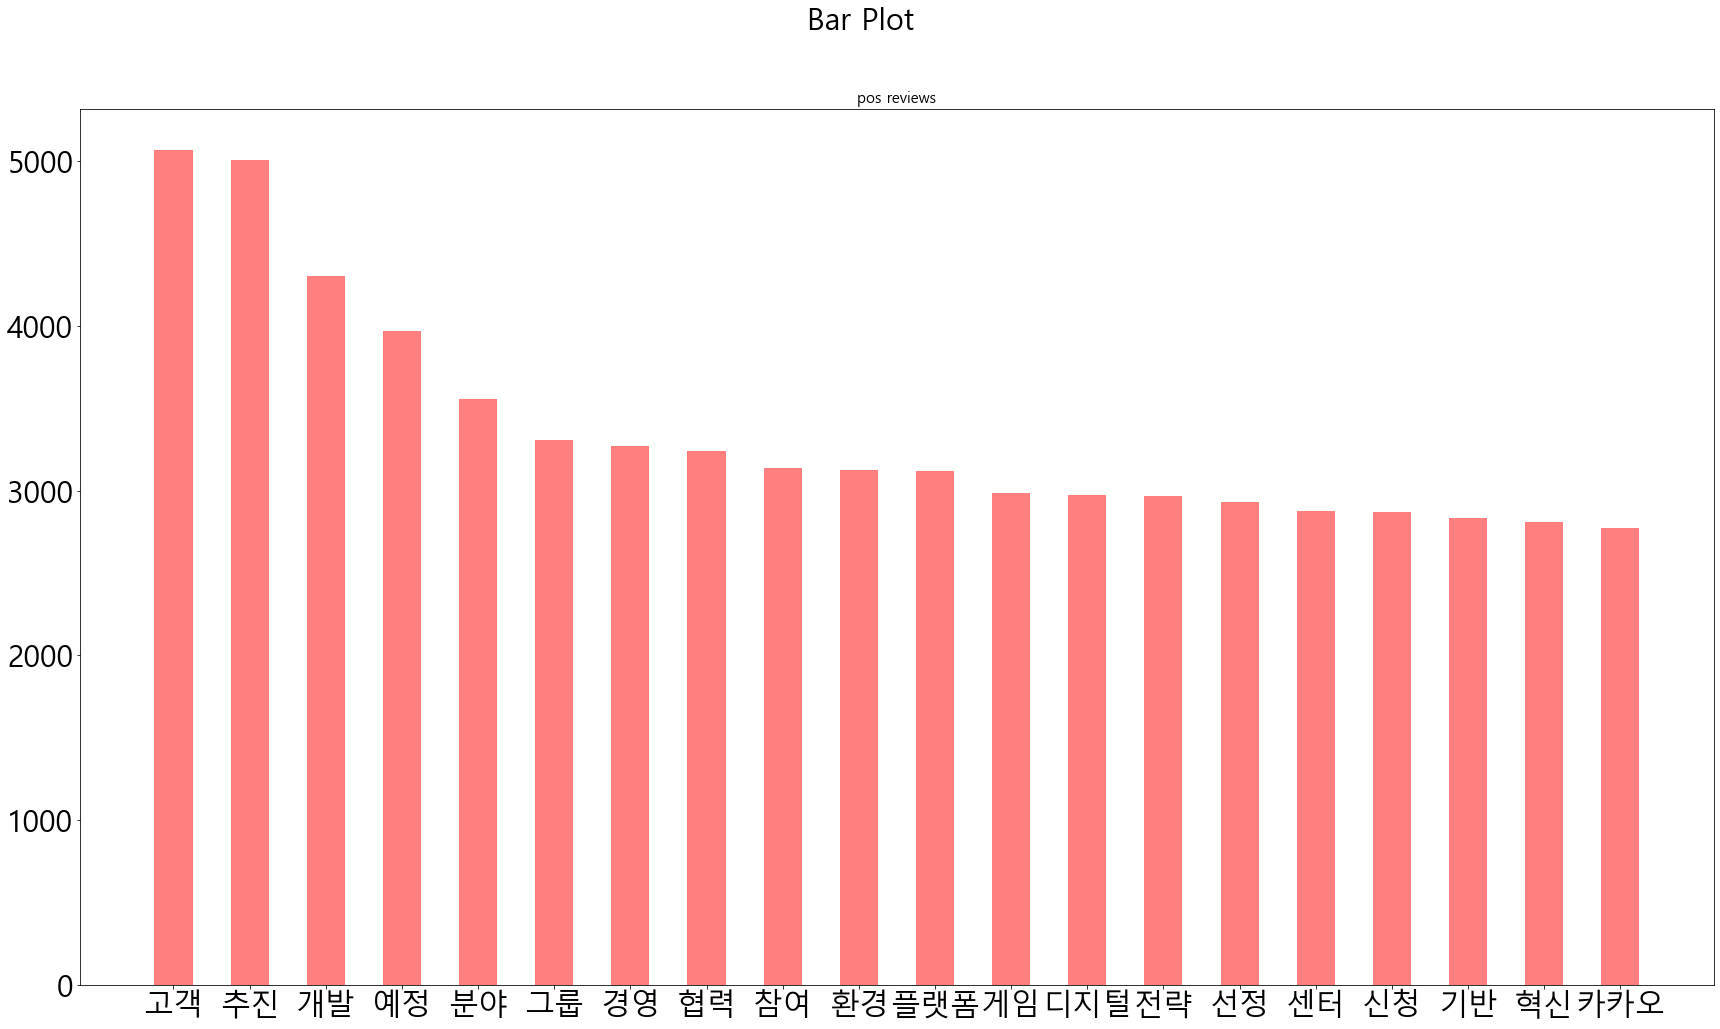

In [71]:
draw_top_hist(pos_in_neu_freq,'pos reviews','r')

In [68]:
pos_in_neu_freq [:20]

고객     5066
추진     5008
개발     4303
예정     3970
분야     3556
그룹     3309
경영     3272
협력     3241
참여     3135
환경     3128
플랫폼    3121
게임     2983
디지털    2975
전략     2965
선정     2933
센터     2877
신청     2871
기반     2833
혁신     2811
카카오    2771
dtype: int64

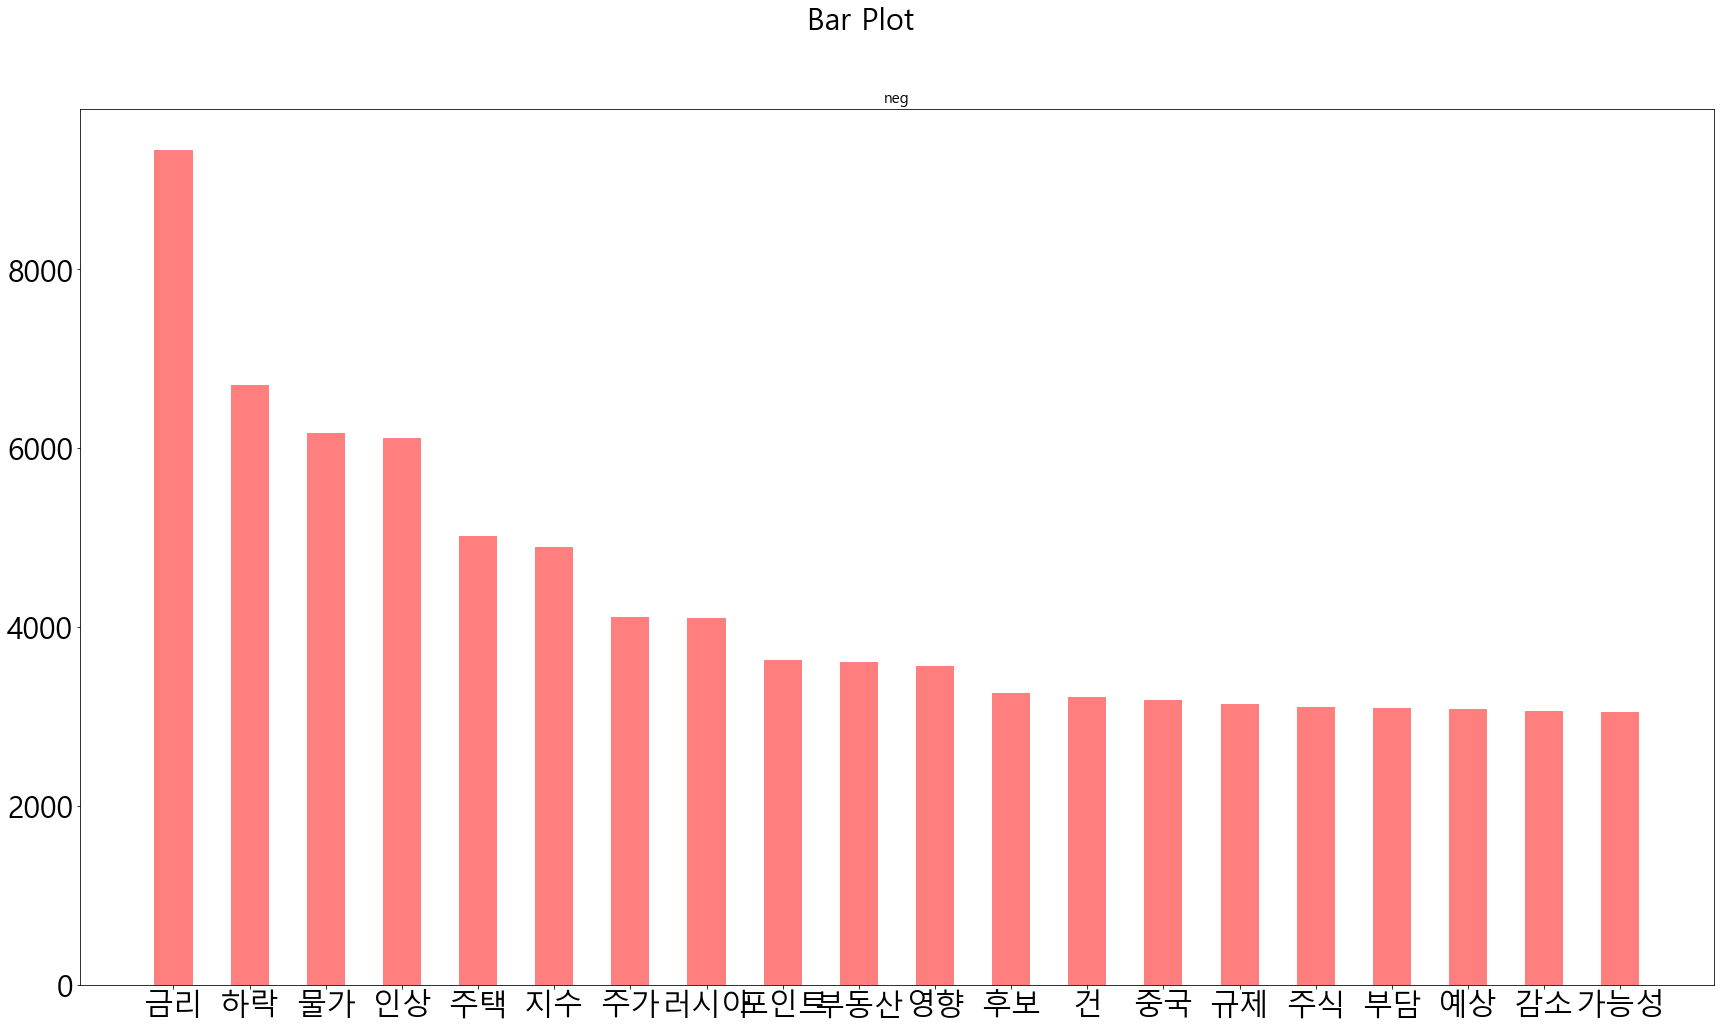

In [72]:
draw_top_hist(neg_in_neu_freq,'neg','r')

In [70]:
neg_in_neu_freq[:20]

금리     9332
하락     6708
물가     6166
인상     6118
주택     5020
지수     4900
주가     4111
러시아    4106
포인트    3630
부동산    3610
영향     3567
후보     3260
건      3213
중국     3190
규제     3137
주식     3110
부담     3100
예상     3079
감소     3063
가능성    3056
dtype: int64